# Steam App Details Dataset

In [3]:
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import json
import ast
import time

In [4]:
df_steam = pd.read_csv('./clean_datasets/steam.csv', index_col=0, dayfirst=True, parse_dates=['release_date'])
df_steam_tags = pd.read_csv('./clean_datasets/steamspy_tag_data.csv', index_col=0)
df_steam_requirements = pd.read_csv('./clean_datasets/steam_requirements_data.csv', index_col=0)
df_steam_descriptions = pd.read_csv('./clean_datasets/steam_description_data.csv', index_col=0)
df_steam_support = pd.read_csv('./clean_datasets/steam_support.csv', index_col=0)
df_steam_achievements = pd.read_csv('./clean_datasets/steam_achievements.csv')
df_steam_categories = pd.read_csv('./clean_datasets/steam_categories.csv')
df_steam_developers = pd.read_csv('./clean_datasets/steam_developers.csv')

In [5]:
df_steam.head()

,name,release_date,english,publisher,required_age,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_range,windows,linux,mac
appid,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,True,Valve,0,124534,3339,17612,317,7.19,"[10000000, 20000000]",True,True,True
20,Team Fortress Classic,1999-04-01,True,Valve,0,3318,633,277,62,3.99,"[5000000, 10000000]",True,True,True
30,Day of Defeat,2003-05-01,True,Valve,0,3416,398,187,34,3.99,"[5000000, 10000000]",True,True,True
40,Deathmatch Classic,2001-06-01,True,Valve,0,1273,267,258,184,3.99,"[5000000, 10000000]",True,True,True
50,Half-Life: Opposing Force,1999-11-01,True,Valve,0,5250,288,624,415,3.99,"[5000000, 10000000]",True,True,True


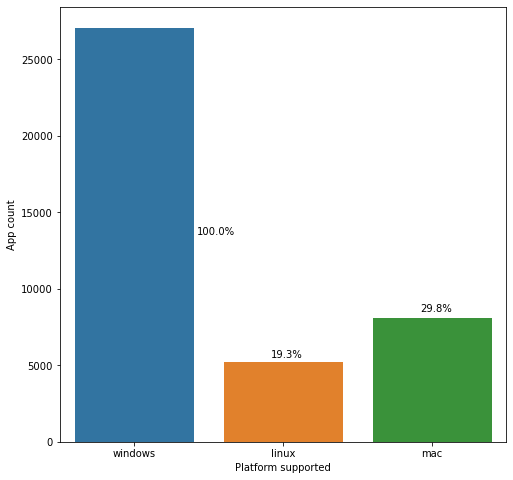

In [4]:
plt.figure(figsize=(8, 8))

df_plats = df_steam.drop(columns=['name', 'release_date', 'english', 'publisher', 'required_age', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners_range', 'price'])

df2 = df_plats.melt(value_vars=df_plats.columns)
df2 = df2[df2["value"] != False]
plats_plot = sb.countplot(data=df2, x="variable")
plats_plot.set(xlabel='Platform supported', ylabel='App count')

total = len(df_plats['windows'])

patchWindows = plats_plot.patches[0]
percentage = '{:.1f}%'.format(100 * patchWindows.get_height() / total)
x = patchWindows.get_x() + patchWindows.get_width() + 0.02
y = patchWindows.get_y() + patchWindows.get_height() / 2
plats_plot.annotate(percentage, (x, y))

patchLinux = plats_plot.patches[1]
percentage = '{:.1f}%'.format(100 * patchLinux.get_height() / total)
x = patchLinux.get_x() + patchLinux.get_width() / 2 - 0.08
y = patchLinux.get_y() + patchLinux.get_height() * 1.05
plats_plot.annotate(percentage, (x, y))

patchMac = plats_plot.patches[2]
percentage = '{:.1f}%'.format(100 * patchMac.get_height() / total)
x = patchMac.get_x() + patchMac.get_width() / 2 - 0.08
y = patchMac.get_y() + patchMac.get_height() * 1.05
plats_plot.annotate(percentage, (x, y))

plt.savefig('plots/platforms_count.png')

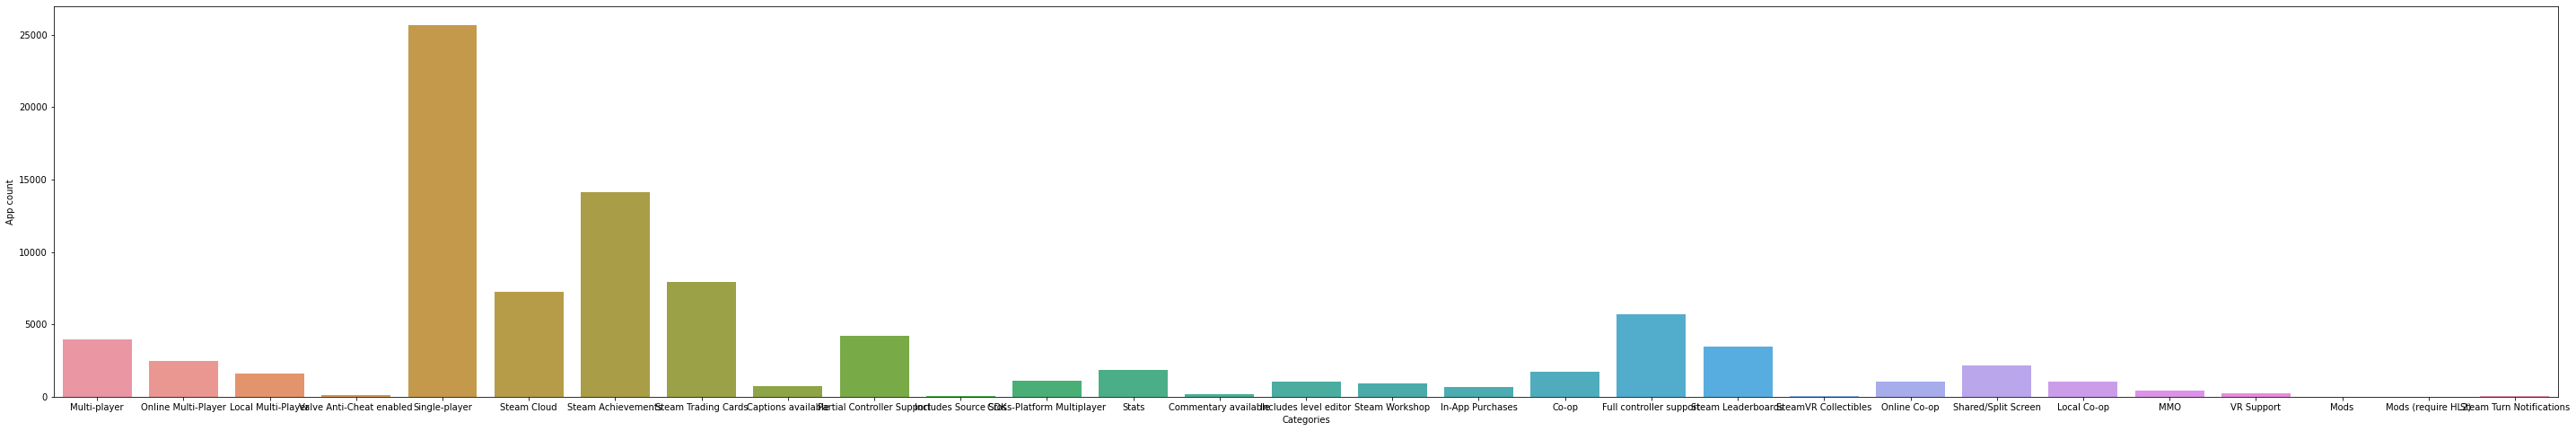

In [5]:
plt.figure(figsize=(50, 8))

total = len(df_steam_categories['appid'])
df_categories = df_steam_categories.drop(columns=['appid'])

df2 = df_categories.melt(value_vars=df_categories.columns)
df2 = df2[df2["value"] != False]
plats_plot = sb.countplot(data=df2, x="variable")
plats_plot.set(xlabel='Categories', ylabel='App count')
    
plt.show()

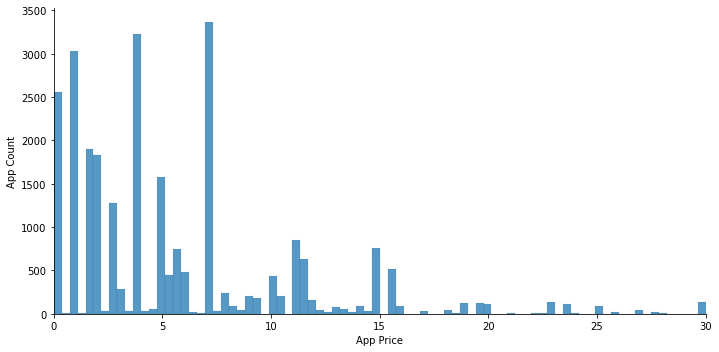

In [6]:
prices1 = sb.displot(df_steam, x="price", multiple="stack", aspect=2)
plt.xlim(0,30)
prices1.set(xlabel='App Price', ylabel='App Count')
plt.savefig('plots/prices_1.png')

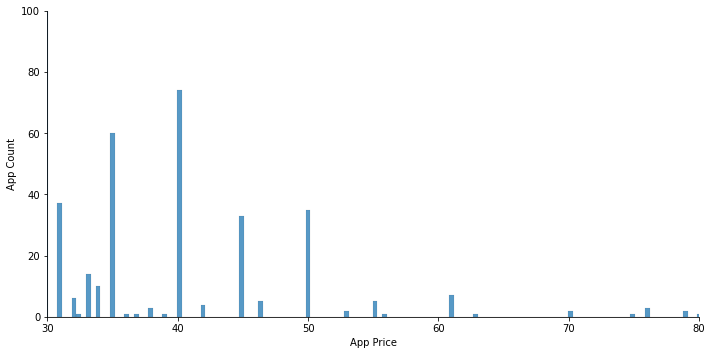

In [7]:
prices2 = sb.displot(df_steam, x="price", multiple="stack", aspect=2)
plt.xlim(30,80)
plt.ylim(0,100)
prices2.set(xlabel='App Price', ylabel='App Count')
plt.savefig('plots/prices_2.png')

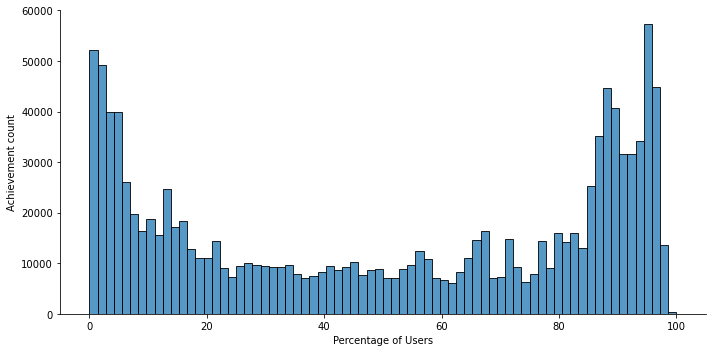

In [8]:
achiev_percent = sb.displot(df_steam_achievements, x="percent", multiple="stack", aspect=2)
achiev_percent.set(xlabel='Percentage of Users', ylabel='Achievement count')
plt.savefig('plots/achievements_percents.png')

In [9]:
number_achievements = pd.DataFrame({'n_achiev': []})
number_achievements['n_achiev'] = df_steam_categories['appid'].apply(lambda x: (df_steam_achievements['appid'] == x).sum())

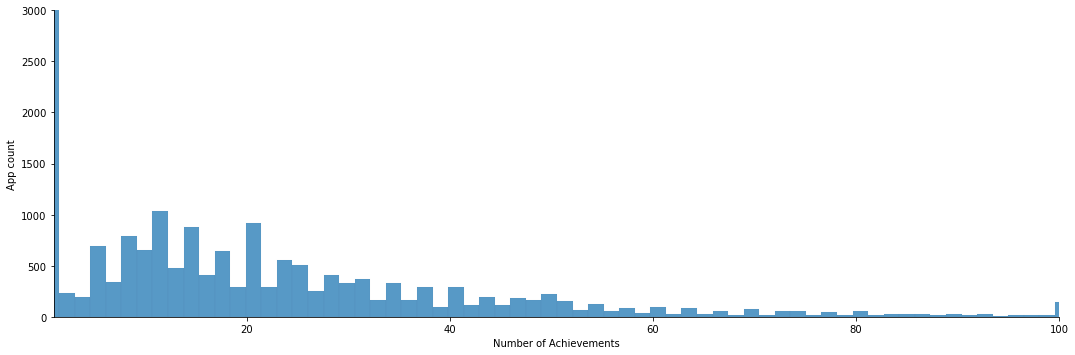

In [10]:
achiev_percent = sb.displot(number_achievements, x="n_achiev", multiple="stack", aspect=3)
achiev_percent.set(xlabel='Number of Achievements', ylabel='App count')
plt.xlim(1,100)
plt.ylim(0,3000)
plt.savefig('plots/achievements_number.png')

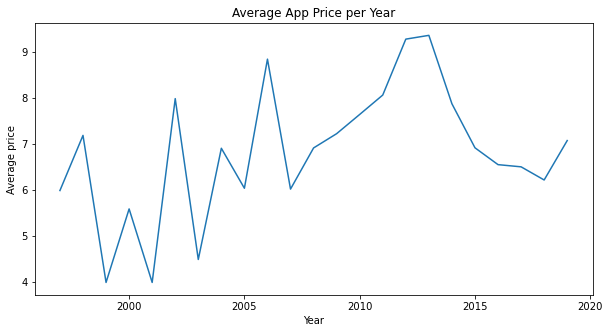

In [11]:
unique_years = np.sort(df_steam['release_date'].dt.year.unique())
averages = []

for year in unique_years:
    average = 0
    rows = df_steam[(df_steam['release_date'].dt.year == year) & (df_steam['price'] != 0)]['price']
    average += rows.sum()
    average /= len(rows)
    averages.append(average)

plt.figure(figsize=(10, 5))
plt.plot(unique_years, averages)
plt.title('Average App Price per Year')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.savefig('plots/prices_years.png')

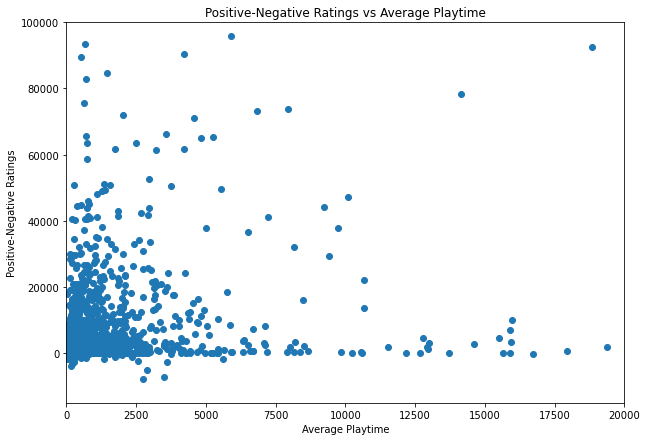

In [16]:
review_diffs = df_steam['positive_ratings'] - df_steam['negative_ratings']

plt.figure(figsize=(10, 7))
plt.scatter(df_steam['average_playtime'], review_diffs)
plt.xlim(0, 20000)
plt.ylim(-15000,100000)
plt.title('Positive-Negative Ratings vs Average Playtime')
plt.xlabel('Average Playtime')
plt.ylabel('Positive-Negative Ratings')

plt.savefig('plots/ratings_playtime.png')

In [12]:
df_steam_descriptions['count_1'] = df_steam_descriptions['detailed_description'].astype("str").apply(lambda x: len(x.split(" ")))
df_steam_descriptions['count_2'] = df_steam_descriptions['about_the_game'].astype("str").apply(lambda x: len(x.split(" ")))
df_steam_descriptions['count_3'] = df_steam_descriptions['short_description'].astype("str").apply(lambda x: len(x.split(" ")))

In [34]:
data = {('Detailed description'): 
       {('Total words'): int(df_steam_descriptions['count_1'].sum()),
        ('Average words'): int(df_steam_descriptions['count_1'].mean())},
        
        ('About the game'): 
       {('Total words'): int(df_steam_descriptions['count_2'].sum()),
        ('Average words'): int(df_steam_descriptions['count_2'].mean())},
        
        ('Short description'): 
       {('Total words'): int(df_steam_descriptions['count_3'].sum()),
        ('Average words'): int(df_steam_descriptions['count_3'].mean())}}

table = pd.DataFrame.from_dict(data)

styled_table = table.style.background_gradient(cmap=cm)
styled_table

,Detailed description,About the game,Short description
Total words,5904977,5739149,930376
Average words,216,209,34


In [63]:
data = {('Detailed description'): 
       {('Detailed description'): (len(df_steam_descriptions[(df_steam_descriptions['detailed_description'].astype("str") == df_steam_descriptions['detailed_description'].astype("str"))])/len(df_steam_descriptions))*100,
        ('About the game'): (len(df_steam_descriptions[(df_steam_descriptions['detailed_description'].astype("str") == df_steam_descriptions['about_the_game'].astype("str"))])/len(df_steam_descriptions))*100,
        ('Short description'): (len(df_steam_descriptions[(df_steam_descriptions['detailed_description'].astype("str") == df_steam_descriptions['short_description'].astype("str"))])/len(df_steam_descriptions))*100},
        
        ('About the game'): 
        {('Detailed description'): (len(df_steam_descriptions[(df_steam_descriptions['about_the_game'].astype("str") == df_steam_descriptions['detailed_description'].astype("str"))])/len(df_steam_descriptions))*100,
        ('About the game'): (len(df_steam_descriptions[(df_steam_descriptions['about_the_game'].astype("str") == df_steam_descriptions['about_the_game'].astype("str"))])/len(df_steam_descriptions))*100,
        ('Short description'): (len(df_steam_descriptions[(df_steam_descriptions['about_the_game'].astype("str") == df_steam_descriptions['short_description'].astype("str"))])/len(df_steam_descriptions))*100},
        
        ('Short description'): 
        {('Detailed description'): (len(df_steam_descriptions[(df_steam_descriptions['short_description'].astype("str") == df_steam_descriptions['detailed_description'].astype("str"))])/len(df_steam_descriptions))*100,
        ('About the game'): (len(df_steam_descriptions[(df_steam_descriptions['short_description'].astype("str") == df_steam_descriptions['about_the_game'].astype("str"))])/len(df_steam_descriptions))*100,
        ('Short description'): (len(df_steam_descriptions[(df_steam_descriptions['short_description'].astype("str") == df_steam_descriptions['short_description'].astype("str"))])/len(df_steam_descriptions))*100},
       }

table = pd.DataFrame.from_dict(data)

styled_table = table.style.background_gradient(cmap=cm)
styled_table

,Detailed description,About the game,Short description
Detailed description,100.000000,91.424599,0.541450
About the game,91.424599,100.000000,0.570718
Short description,0.541450,0.570718,100.000000


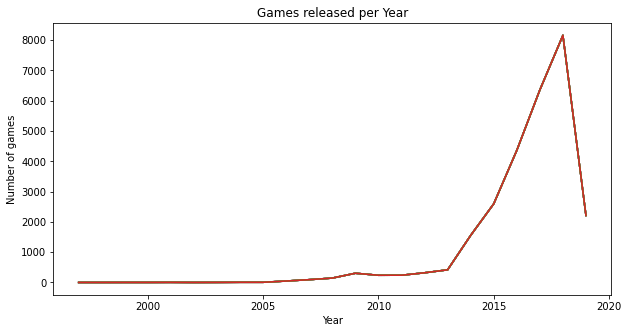

In [12]:
unique_years = np.sort(df_steam['release_date'].dt.year.unique())
games_released = []

for year in unique_years:
    number_of_games = 0
    number_of_games = df_steam[(df_steam['release_date'].dt.year == year)].count()
    games_released.append(number_of_games)

plt.figure(figsize=(10, 5))
plt.plot(unique_years, games_released)
plt.title('Games released per Year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.savefig('plots/games_years.png')